***Project 3 by Tahmid Zaman Tahi***

Environment:

In [42]:
import numpy as np
maze= np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1], 
                [1, 2, 2, 2, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1], 
                [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1], 
                [1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1], 
                [1, 2, 0, 1, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1], 
                [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1],
                [1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2, 0, 1], 
                [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1], 
                [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                [1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1], 
                [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1], 
                [1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 1], 
                [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1], 
                [1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1], 
                [1, 0, 0, 0, 4, 0, 0, 1, 0, 0, 3, 0, 0, 1, 1, 1, 1, 2, 2, 1],
                [1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1], 
                [1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 3, 0, 0, 3, 0, 1], 
                [1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],np.int32)

#Define start and goal point
start_position = None
goal_position = None
for i in range(len(maze)):
    for j in range(len(maze[i])):
        if maze[i][j] == 4:
            start_position = (i, j)
        elif maze[i][j] == 5:
            goal_position = (i, j)
# Define state space
S = []
for i in range(len(maze)):
    for j in range(len(maze[i])):
        if maze[i][j] != 1:
            S.append((i, j))

# Define action space
A = ["U", "D", "L", "R"]

# Define transition probabilities
p = 0.02
anticipated_p = 1 - p
neighbor_p = p / 3

# Define reward function
def reward(state):
    i, j = state
    cell = maze[i][j]
    if cell == 1:  # wall
        return None
    elif cell == 2 or cell == 3:  # oil or bump
        return -5 if cell == 2 else -10
    elif cell == 5:  # goal
        return 200
    else:  # empty space
        return -1


gamma = 0.95
theta = 0.01

def next_state(state, action):
    if action == "U":
        return (state[0] - 1, state[1])
    elif action == "D":
        return (state[0] + 1, state[1])
    elif action == "L":
        return (state[0], state[1] - 1)
    elif action == "R":
        return (state[0], state[1] + 1)

def action_value(state, action, V):
    next_s = next_state(state, action)
    if next_s in S:
        anticipated_value = anticipated_p * (reward(next_s) + gamma * V[next_s])
        neighbor_value = 0
        for neighbor_action in A:
            if neighbor_action != action:
                neighbor_s = next_state(state, neighbor_action)
                if neighbor_s in S:
                    neighbor_value += neighbor_p * (reward(neighbor_s) + gamma * V[neighbor_s])
        return anticipated_value + neighbor_value
    else:
        return -np.inf

**SARSA algorithm implementation** 

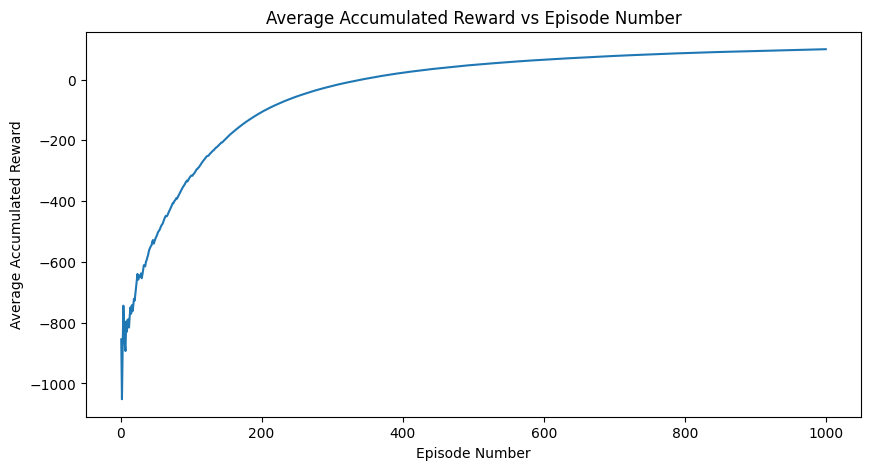

Q values:
(1, 1):
  U: -6.82
  D: -6.80
  L: -6.70
  R: -3.35
(1, 2):
  U: -6.46
  D: -6.84
  L: -6.54
  R: 48.42
(1, 3):
  U: 31.38
  D: 45.38
  L: 11.86
  R: 87.26
(1, 4):
  U: 89.17
  D: 83.02
  L: 71.00
  R: 100.48
(1, 5):
  U: 101.24
  D: 93.37
  L: 91.00
  R: 108.49
(1, 6):
  U: 106.80
  D: 90.67
  L: 95.74
  R: 114.70
(1, 7):
  U: 115.83
  D: 111.62
  L: 104.01
  R: 121.73
(1, 8):
  U: 124.29
  D: 124.30
  L: 108.49
  R: 127.97
(1, 9):
  U: 128.69
  D: 130.39
  L: 118.17
  R: 132.00
(1, 10):
  U: -2.12
  D: 146.87
  L: 37.40
  R: -3.53
(1, 11):
  U: -2.55
  D: 86.36
  L: -0.94
  R: -1.50
(1, 12):
  U: -2.55
  D: 105.32
  L: -1.59
  R: -0.30
(1, 13):
  U: -0.51
  D: 28.56
  L: -1.50
  R: -0.30
(1, 14):
  U: -0.51
  D: -0.51
  L: -0.60
  R: -0.30
(1, 15):
  U: -1.01
  D: -0.74
  L: -0.60
  R: -0.71
(1, 16):
  U: -1.29
  D: -3.00
  L: -1.01
  R: -1.04
(1, 17):
  U: -1.58
  D: -1.54
  L: -1.25
  R: -1.53
(1, 18):
  U: -1.54
  D: -1.54
  L: -1.56
  R: -1.60
(2, 1):
  U: -6.35
  D: 55

In [38]:
import numpy as np
import random
import matplotlib.pyplot as plt

def epsilon_greedy_policy(state, Q, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.choice(A)
    else:
        return max(A, key=lambda action: Q[(state, action)])

# Initialize Q table
Q = {}
for state in S:
    for action in A:
        Q[(state, action)] = 0

# Set the parameters
epsilon = 0.1
alpha = 0.3
num_episodes = 1000
max_steps = 1000

accumulated_rewards = []

for episode in range(num_episodes):
    state = start_position
    action = epsilon_greedy_policy(state, Q, epsilon)
    step_count = 0
    total_reward = 0

    while state != goal_position and step_count < max_steps:
        next_s = next_state(state, action)
        if next_s not in S:
            next_s = state
        
        reward_s_a = reward(next_s)
        total_reward += reward_s_a
        next_action = epsilon_greedy_policy(next_s, Q, epsilon)
        Q[(state, action)] += alpha * (reward_s_a + gamma * Q[(next_s, next_action)] - Q[(state, action)])
        
        state = next_s
        action = next_action
        step_count += 1

    accumulated_rewards.append(total_reward)

average_rewards = [np.mean(accumulated_rewards[:i+1]) for i in range(len(accumulated_rewards))]

# Plot the average accumulated reward with respect to the episode number
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_episodes + 1), average_rewards)
plt.xlabel('Episode Number')
plt.ylabel('Average Accumulated Reward')
plt.title('Average Accumulated Reward vs Episode Number')
plt.show()




print("Q values:")
for state in S:
    print(f"{state}:")
    for action in A:
        print(f"  {action}: {Q[(state, action)]:.2f}")


In [39]:
def get_optimal_policy(Q):
    optimal_policy = {}
    for state in S:
        best_action = max(A, key=lambda action: Q[(state, action)])
        optimal_policy[state] = best_action
    return optimal_policy

def get_optimal_path(optimal_policy, start_position, goal_position):
    optimal_path = []
    state = start_position
    while state != goal_position:
        optimal_path.append(state)
        action = optimal_policy[state]
        state = next_state(state, action)
    optimal_path.append(goal_position)
    return optimal_path

optimal_policy = get_optimal_policy(Q)
optimal_path = get_optimal_path(optimal_policy, start_position, goal_position)

print("Optimal policy:")
for state in S:
    print(f"{state}: {optimal_policy[state]}")

print("Optimal path:")
for state in optimal_path:
    print(state)


Optimal policy:
(1, 1): R
(1, 2): R
(1, 3): R
(1, 4): R
(1, 5): R
(1, 6): R
(1, 7): R
(1, 8): R
(1, 9): R
(1, 10): D
(1, 11): D
(1, 12): D
(1, 13): D
(1, 14): R
(1, 15): L
(1, 16): L
(1, 17): L
(1, 18): U
(2, 1): D
(2, 2): D
(2, 3): R
(2, 4): U
(2, 6): R
(2, 7): D
(2, 8): D
(2, 9): D
(2, 10): D
(2, 11): D
(2, 12): R
(2, 13): D
(2, 14): L
(2, 15): L
(2, 16): U
(2, 17): R
(2, 18): D
(3, 1): R
(3, 2): R
(3, 3): R
(3, 4): U
(3, 6): R
(3, 7): R
(3, 8): R
(3, 9): R
(3, 10): R
(3, 11): R
(3, 12): R
(3, 13): U
(3, 14): L
(3, 15): L
(3, 16): L
(3, 17): L
(3, 18): L
(4, 1): U
(4, 2): L
(4, 17): U
(4, 18): U
(5, 1): U
(5, 2): D
(5, 4): L
(5, 5): U
(5, 6): D
(5, 7): D
(5, 8): D
(5, 9): R
(5, 10): R
(5, 11): R
(5, 12): R
(5, 13): R
(5, 14): R
(5, 15): R
(5, 16): R
(5, 17): U
(5, 18): U
(6, 1): U
(6, 2): L
(6, 4): D
(6, 5): L
(6, 7): R
(6, 8): L
(6, 10): R
(6, 11): R
(6, 12): R
(6, 13): U
(6, 14): U
(6, 16): D
(6, 17): R
(6, 18): U
(7, 1): U
(7, 2): L
(7, 4): D
(7, 5): D
(7, 7): R
(7, 8): U
(7, 10):

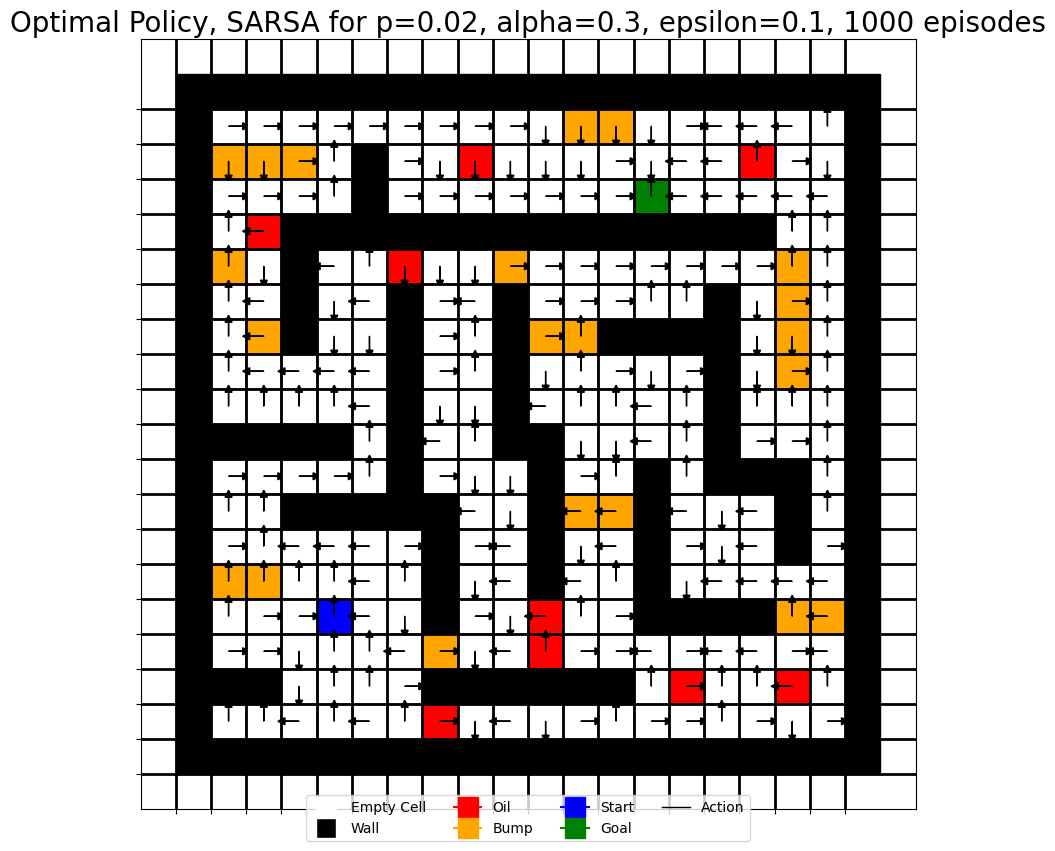

In [40]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

cmap = plt.get_cmap('tab20')
colors = {
    1: 'black',
    2: 'orange',
    3: 'red',
    4: 'blue',
    5: 'green',
    0: 'white'
}

fig, ax = plt.subplots(figsize=(10, 10))

for i in range(len(maze)):
   for j in range(len(maze[i])):
        cell_type = maze[i][j]
        color = colors[cell_type]
        rect = plt.Rectangle((j, len(maze) - i - 1), 1, 1, facecolor=color, edgecolor='black')
        ax.add_patch(rect)
        if cell_type != 1:
            action = optimal_policy[(i, j)]
            
            # Draw arrow
            dx, dy = 0, 0
            if action == "U":
                dy = 0.4
            elif action == "D":
                dy = -0.4
            elif action == "L":
                dx = -0.4
            elif action == "R":
                dx = 0.4
            ax.arrow(j+0.5, len(maze)-i-0.48, dx, dy, head_width=0.2, head_length=0.2, fc='black', ec='black')

ax.set_xticks(np.arange(0, len(maze[0]), 1))
ax.set_yticks(np.arange(0, len(maze), 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(True, color='black', linestyle='-', linewidth=2)

legend_elements = [
    Line2D([0], [0], marker='s', color='w', label='Empty Cell', markerfacecolor='white', markersize=15),
    Line2D([0], [0], marker='s', color='w', label='Wall', markerfacecolor='black', markersize=15),
    Line2D([0], [0], marker='s', color='red', label='Oil', markerfacecolor='red', markersize=15),
    Line2D([0], [0], marker='s', color='orange', label='Bump', markerfacecolor='orange', markersize=15),
    Line2D([0], [0], marker='s', color='b', label='Start', markerfacecolor='blue', markersize=15),
    Line2D([0], [0], marker='s', color='g', label='Goal', markerfacecolor='green', markersize=15),
    Line2D([0], [0], color='black', lw=1, label='Action'),
]
ax.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4)
ax.set_title('Optimal Policy, SARSA for p=0.02, alpha=0.3, epsilon=0.1, 1000 episodes', fontsize=20)
plt.show()

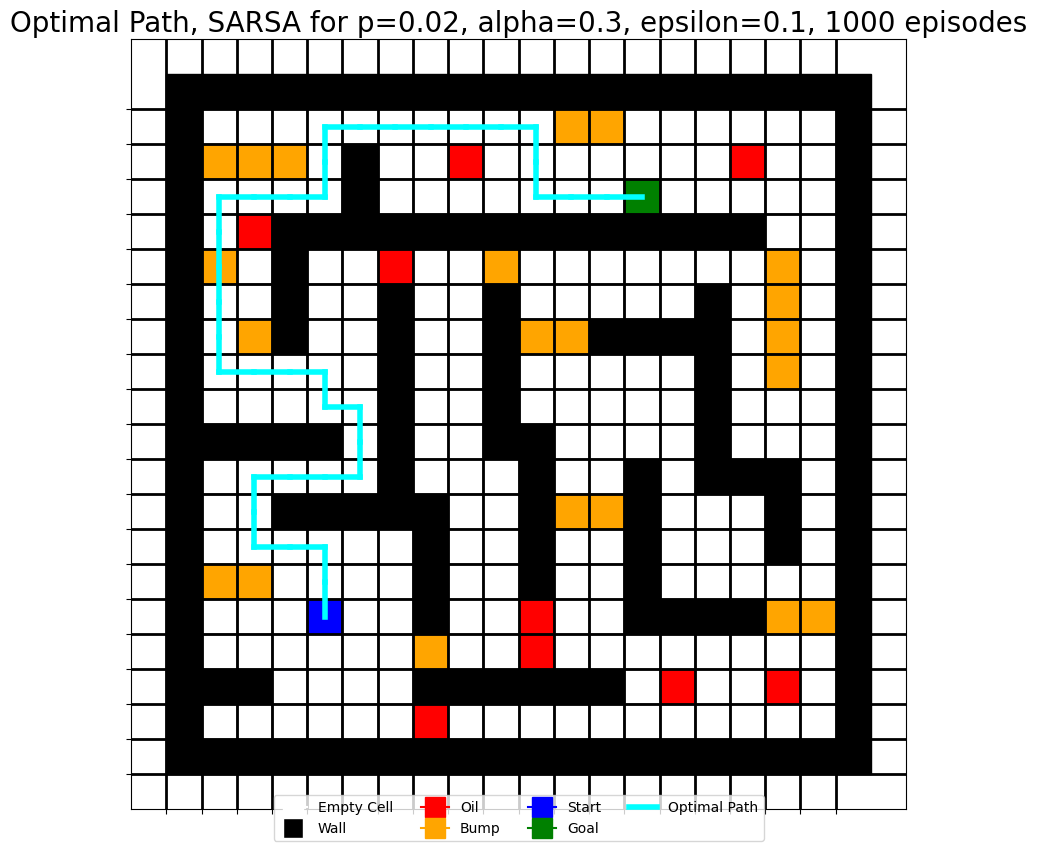

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))

for i in range(len(maze)):
   for j in range(len(maze[i])):
        cell_type = maze[i][j]
        color = colors[cell_type]
        rect = plt.Rectangle((j, len(maze) - i - 1), 1, 1, facecolor=color, edgecolor='black')
        ax.add_patch(rect)

# Draw optimal path
for i in range(len(optimal_path) - 1):
    cur_state = optimal_path[i]
    next_state = optimal_path[i + 1]
    plt.plot([cur_state[1] + 0.5, next_state[1] + 0.5], [len(maze) - cur_state[0] - 0.5, len(maze) - next_state[0] - 0.5], 'cyan', linewidth=4)

ax.set_xticks(np.arange(0, len(maze[0]), 1))
ax.set_yticks(np.arange(0, len(maze), 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(True, color='black', linestyle='-', linewidth=2)

legend_elements = [
    Line2D([0], [0], marker='s', color='w', label='Empty Cell', markerfacecolor='white', markersize=15),
    Line2D([0], [0], marker='s', color='w', label='Wall', markerfacecolor='black', markersize=15),
    Line2D([0], [0], marker='s', color='red', label='Oil', markerfacecolor='red', markersize=15),
    Line2D([0], [0], marker='s', color='orange', label='Bump', markerfacecolor='orange', markersize=15),
    Line2D([0], [0], marker='s', color='b', label='Start', markerfacecolor='blue', markersize=15),
    Line2D([0], [0], marker='s', color='g', label='Goal', markerfacecolor='green', markersize=15),
    Line2D([0], [0], color='cyan', lw=4, label='Optimal Path'),
]
ax.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4)
ax.set_title('Optimal Path, SARSA for p=0.02, alpha=0.3, epsilon=0.1, 1000 episodes', fontsize=20)
plt.show()


**Observations for SARSA algoritm**


1. Among 10 independent runs, 7 times a path has been obtained upon termination of learning.

Results from a few random runs:

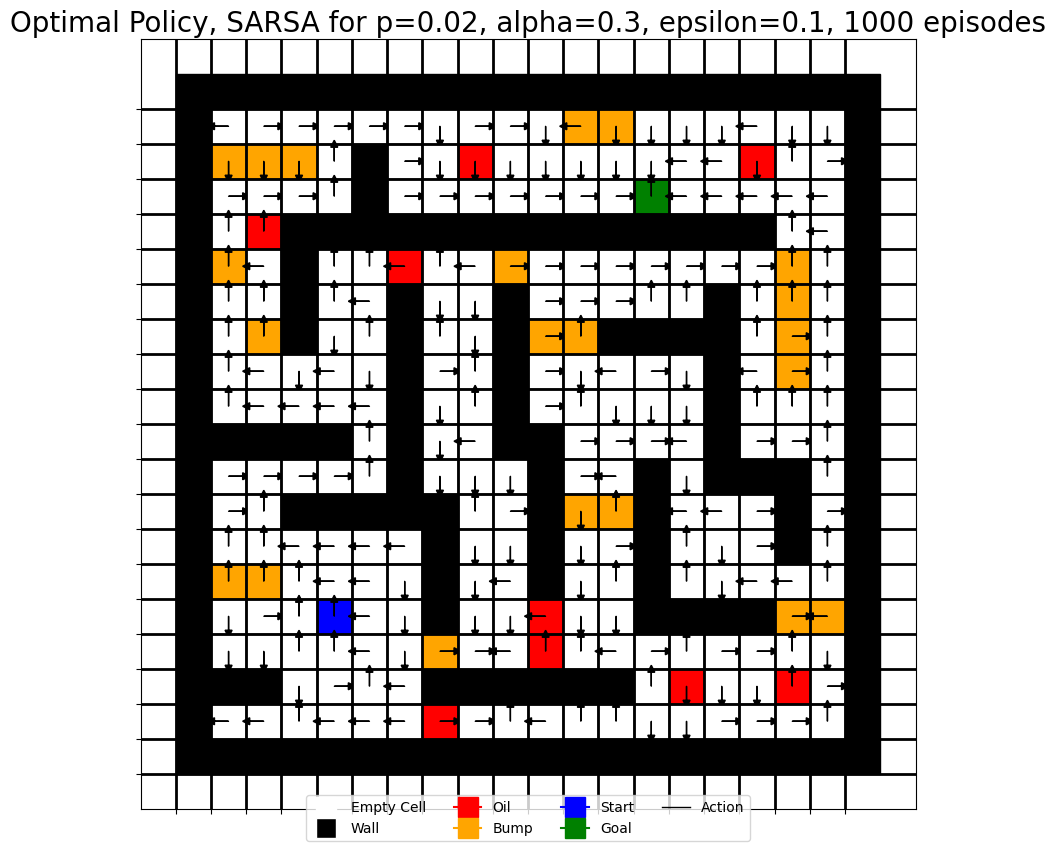

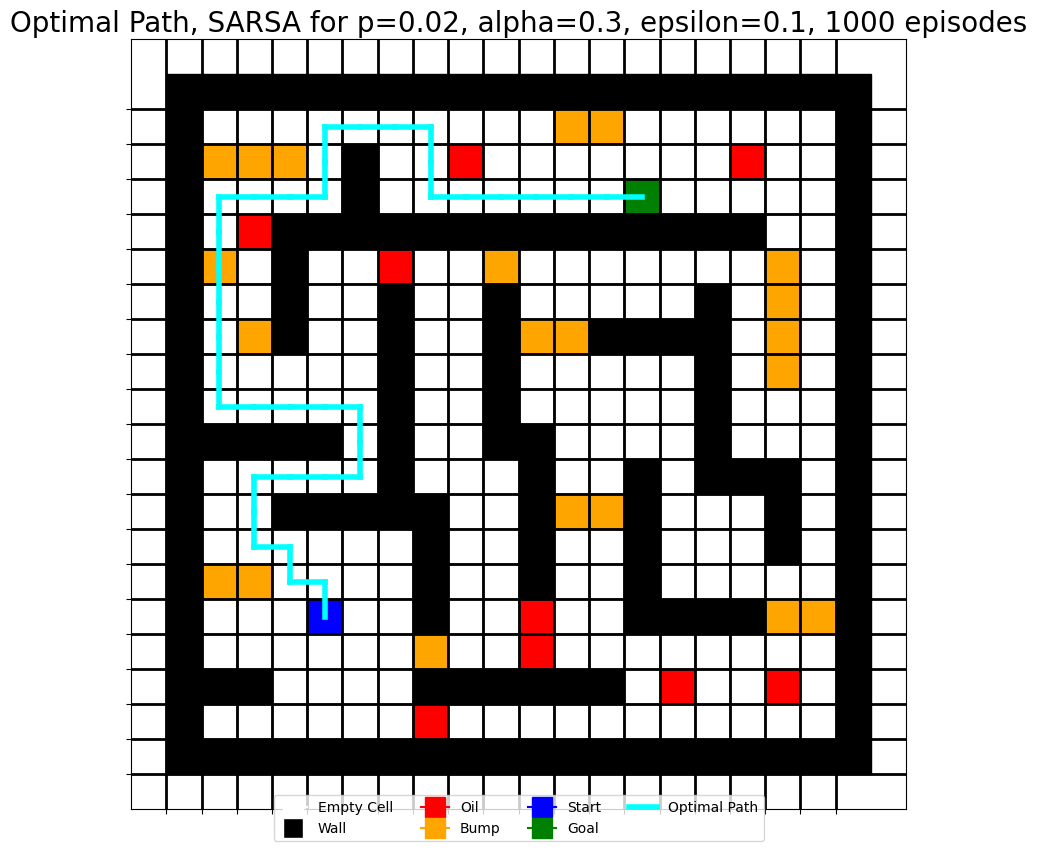

# Q-learning algorithm implementation

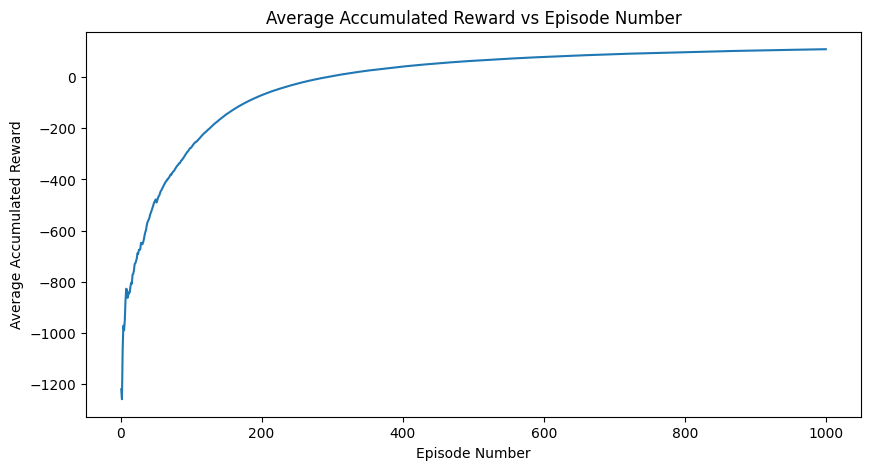

Q values:
(1, 1):
  U: 12.82
  D: -6.11
  L: 29.80
  R: 92.92
(1, 2):
  U: 59.19
  D: 34.28
  L: 15.49
  R: 98.88
(1, 3):
  U: 25.91
  D: 42.71
  L: -5.11
  R: 105.14
(1, 4):
  U: 105.11
  D: 98.87
  L: 98.87
  R: 111.72
(1, 5):
  U: 111.72
  D: 111.72
  L: 105.13
  R: 118.65
(1, 6):
  U: 118.64
  D: 111.07
  L: 111.72
  R: 125.95
(1, 7):
  U: 125.95
  D: 118.31
  L: 118.65
  R: 133.63
(1, 8):
  U: 133.62
  D: 122.29
  L: 125.95
  R: 141.72
(1, 9):
  U: 141.69
  D: 150.23
  L: 133.63
  R: 150.23
(1, 10):
  U: 150.22
  D: 159.19
  L: 141.62
  R: 154.08
(1, 11):
  U: -1.50
  D: 168.62
  L: -0.39
  R: -1.50
(1, 12):
  U: -1.50
  D: 177.32
  L: 45.51
  R: -0.30
(1, 13):
  U: 52.76
  D: 188.98
  L: 47.32
  R: -0.30
(1, 14):
  U: -0.60
  D: 81.35
  L: -0.60
  R: -0.68
(1, 15):
  U: -0.89
  D: -0.86
  L: -0.86
  R: -0.71
(1, 16):
  U: -0.89
  D: -5.19
  L: -1.03
  R: -1.05
(1, 17):
  U: -1.17
  D: -1.19
  L: -1.25
  R: -1.33
(1, 18):
  U: -1.46
  D: -1.44
  L: -1.42
  R: -1.40
(2, 1):
  U: 87

In [45]:
import numpy as np
import random
import matplotlib.pyplot as plt

def epsilon_greedy_policy(state, Q, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.choice(A)
    else:
        return max(A, key=lambda action: Q[(state, action)])

# Initialize Q table
Q = {}
for state in S:
    for action in A:
        Q[(state, action)] = 0

# Set the parameters
epsilon = 0.1
alpha = 0.3
num_episodes = 1000
max_steps = 1000

q_rewards = []
#Q-learning algorithm
for episode in range(num_episodes):
    state = start_position
    step_count = 0
    total_reward = 0

    while state != goal_position and step_count < max_steps:
        action = epsilon_greedy_policy(state, Q, epsilon)
        next_s = next_state(state, action)
        if next_s not in S:
            next_s = state
        
        reward_s_a = reward(next_s)
        total_reward += reward_s_a
        max_next_q = max(Q[(next_s, a)] for a in A)
        Q[(state, action)] += alpha * (reward_s_a + gamma * max_next_q - Q[(state, action)])

        state = next_s
        step_count += 1

    q_rewards.append(total_reward)

average_rewards = [np.mean(q_rewards[:i+1]) for i in range(len(q_rewards))]

# Plot the average accumulated reward with respect to the episode number
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_episodes + 1), average_rewards)
plt.xlabel('Episode Number')
plt.ylabel('Average Accumulated Reward')
plt.title('Average Accumulated Reward vs Episode Number')
plt.show()

print("Q values:")
for state in S:
    print(f"{state}:")
    for action in A:
        print(f"  {action}: {Q[(state, action)]:.2f}")

In [46]:
def get_optimal_policy(Q):
    optimal_policy = {}
    for state in S:
        best_action = max(A, key=lambda action: Q[(state, action)])
        optimal_policy[state] = best_action
    return optimal_policy

def get_optimal_path(optimal_policy, start_position, goal_position):
    optimal_path = []
    state = start_position
    while state != goal_position:
        optimal_path.append(state)
        action = optimal_policy[state]
        state = next_state(state, action)
    optimal_path.append(goal_position)
    return optimal_path

optimal_policy = get_optimal_policy(Q)
optimal_path = get_optimal_path(optimal_policy, start_position, goal_position)

print("Optimal policy:")
for state in S:
    print(f"{state}: {optimal_policy[state]}")

print("Optimal path:")
for state in optimal_path:
    print(state)


Optimal policy:
(1, 1): R
(1, 2): R
(1, 3): R
(1, 4): R
(1, 5): R
(1, 6): R
(1, 7): R
(1, 8): R
(1, 9): R
(1, 10): D
(1, 11): D
(1, 12): D
(1, 13): D
(1, 14): D
(1, 15): R
(1, 16): U
(1, 17): U
(1, 18): R
(2, 1): U
(2, 2): U
(2, 3): R
(2, 4): U
(2, 6): U
(2, 7): U
(2, 8): R
(2, 9): R
(2, 10): R
(2, 11): R
(2, 12): R
(2, 13): D
(2, 14): D
(2, 15): D
(2, 16): D
(2, 17): D
(2, 18): R
(3, 1): R
(3, 2): R
(3, 3): R
(3, 4): U
(3, 6): L
(3, 7): D
(3, 8): R
(3, 9): R
(3, 10): U
(3, 11): R
(3, 12): U
(3, 13): U
(3, 14): L
(3, 15): L
(3, 16): L
(3, 17): L
(3, 18): D
(4, 1): U
(4, 2): U
(4, 17): U
(4, 18): L
(5, 1): U
(5, 2): L
(5, 4): R
(5, 5): U
(5, 6): U
(5, 7): D
(5, 8): U
(5, 9): R
(5, 10): R
(5, 11): R
(5, 12): R
(5, 13): R
(5, 14): R
(5, 15): R
(5, 16): R
(5, 17): U
(5, 18): U
(6, 1): U
(6, 2): U
(6, 4): D
(6, 5): L
(6, 7): D
(6, 8): L
(6, 10): R
(6, 11): R
(6, 12): U
(6, 13): U
(6, 14): D
(6, 16): U
(6, 17): R
(6, 18): U
(7, 1): U
(7, 2): L
(7, 4): D
(7, 5): D
(7, 7): L
(7, 8): R
(7, 10):

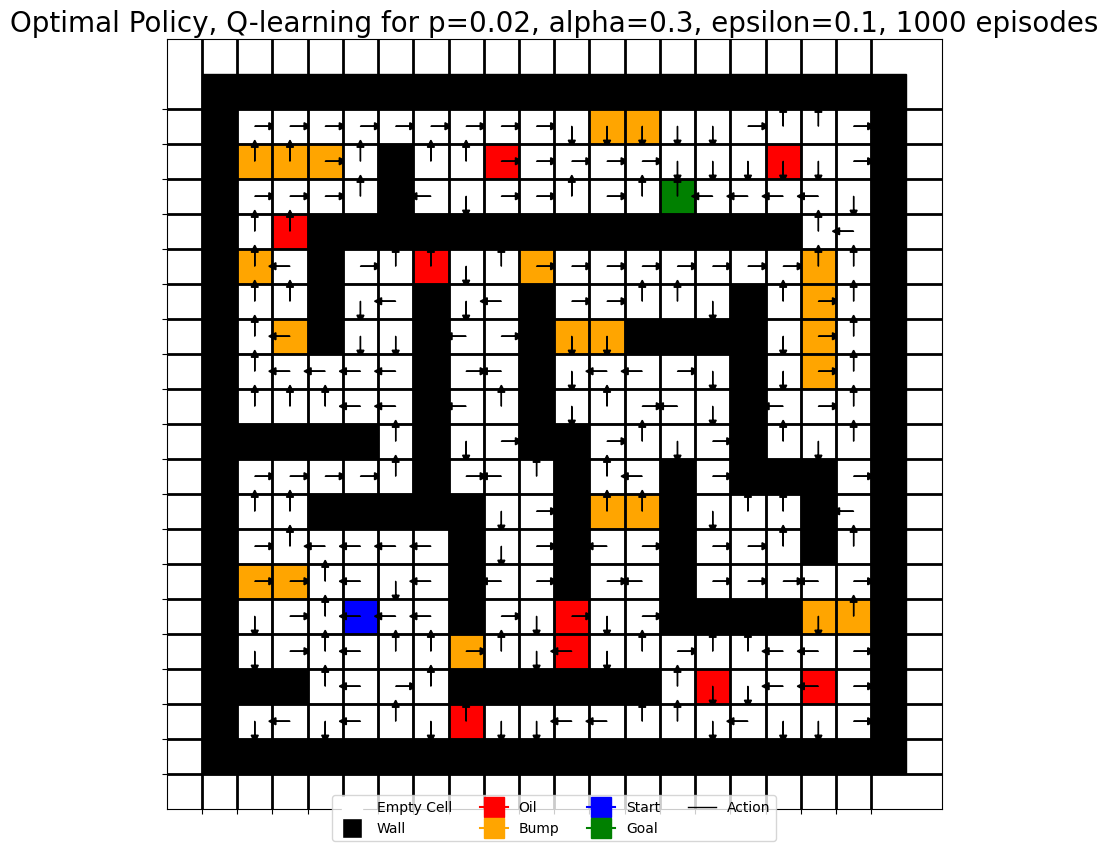

In [49]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

cmap = plt.get_cmap('tab20')
colors = {
    1: 'black',
    2: 'orange',
    3: 'red',
    4: 'blue',
    5: 'green',
    0: 'white'
}

fig, ax = plt.subplots(figsize=(10, 10))

for i in range(len(maze)):
   for j in range(len(maze[i])):
        cell_type = maze[i][j]
        color = colors[cell_type]
        rect = plt.Rectangle((j, len(maze) - i - 1), 1, 1, facecolor=color, edgecolor='black')
        ax.add_patch(rect)
        if cell_type != 1:
            action = optimal_policy[(i, j)]
            
            # Draw arrow
            dx, dy = 0, 0
            if action == "U":
                dy = 0.4
            elif action == "D":
                dy = -0.4
            elif action == "L":
                dx = -0.4
            elif action == "R":
                dx = 0.4
            ax.arrow(j+0.5, len(maze)-i-0.48, dx, dy, head_width=0.2, head_length=0.2, fc='black', ec='black')

ax.set_xticks(np.arange(0, len(maze[0]), 1))
ax.set_yticks(np.arange(0, len(maze), 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(True, color='black', linestyle='-', linewidth=2)

legend_elements = [
    Line2D([0], [0], marker='s', color='w', label='Empty Cell', markerfacecolor='white', markersize=15),
    Line2D([0], [0], marker='s', color='w', label='Wall', markerfacecolor='black', markersize=15),
    Line2D([0], [0], marker='s', color='red', label='Oil', markerfacecolor='red', markersize=15),
    Line2D([0], [0], marker='s', color='orange', label='Bump', markerfacecolor='orange', markersize=15),
    Line2D([0], [0], marker='s', color='b', label='Start', markerfacecolor='blue', markersize=15),
    Line2D([0], [0], marker='s', color='g', label='Goal', markerfacecolor='green', markersize=15),
    Line2D([0], [0], color='black', lw=1, label='Action'),
]
ax.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4)
ax.set_title('Optimal Policy, Q-learning for p=0.02, alpha=0.3, epsilon=0.1, 1000 episodes', fontsize=20)
plt.show()

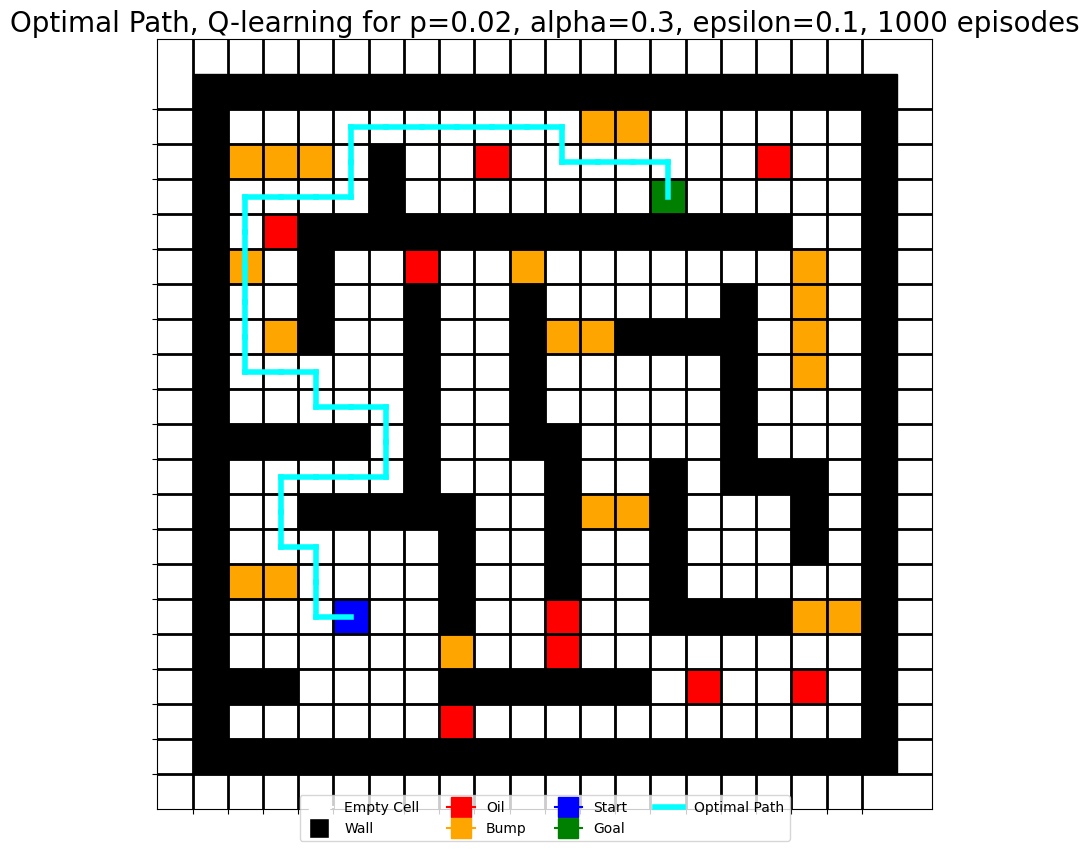

In [50]:
fig, ax = plt.subplots(figsize=(10, 10))

for i in range(len(maze)):
   for j in range(len(maze[i])):
        cell_type = maze[i][j]
        color = colors[cell_type]
        rect = plt.Rectangle((j, len(maze) - i - 1), 1, 1, facecolor=color, edgecolor='black')
        ax.add_patch(rect)

# Draw optimal path
for i in range(len(optimal_path) - 1):
    cur_state = optimal_path[i]
    next_state = optimal_path[i + 1]
    plt.plot([cur_state[1] + 0.5, next_state[1] + 0.5], [len(maze) - cur_state[0] - 0.5, len(maze) - next_state[0] - 0.5], 'cyan', linewidth=4)

ax.set_xticks(np.arange(0, len(maze[0]), 1))
ax.set_yticks(np.arange(0, len(maze), 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(True, color='black', linestyle='-', linewidth=2)

legend_elements = [
    Line2D([0], [0], marker='s', color='w', label='Empty Cell', markerfacecolor='white', markersize=15),
    Line2D([0], [0], marker='s', color='w', label='Wall', markerfacecolor='black', markersize=15),
    Line2D([0], [0], marker='s', color='red', label='Oil', markerfacecolor='red', markersize=15),
    Line2D([0], [0], marker='s', color='orange', label='Bump', markerfacecolor='orange', markersize=15),
    Line2D([0], [0], marker='s', color='b', label='Start', markerfacecolor='blue', markersize=15),
    Line2D([0], [0], marker='s', color='g', label='Goal', markerfacecolor='green', markersize=15),
    Line2D([0], [0], color='cyan', lw=4, label='Optimal Path'),
]
ax.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4)
ax.set_title('Optimal Path, Q-learning for p=0.02, alpha=0.3, epsilon=0.1, 1000 episodes', fontsize=20)
plt.show()

**Observations for Q-learning algorithms:**

Among 10 independent runs, all 10 times a path has been obtained upon termination of learning. This is because since Q-learning is an off-policy method and that there is less exploration, it converges faster. Thus path is obtained much more times than that with SARSA but the results in SARSA are more reliable since more exploration occurs. 

# Average accumulated rewards vs number of episodes

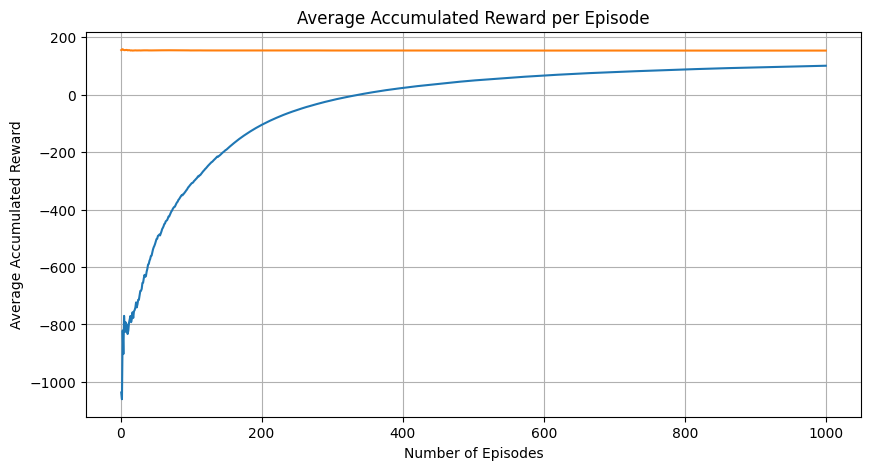

**SARSA trial and error:**

Attempts were made to obtain path for all 10 independent runs using SARSA algorithms. Parameters were tuned in multiple ways. Gamma was reduced so that future rewards aren't prioritized so that less number of episodes are required. Step length was tuned, episode numbers were changed. After multiple trial and errors, it was found that increasing alpha to 0.4, reducing epsilon to 0.05 and increasing max steps to 1200 allows the algorithm to give optimal path for all 10 independent runs. 

Reducing epsilon increasing exploitation, decreases exploration. Increasing alpha increases learning rate and thus causes faster convergence. 

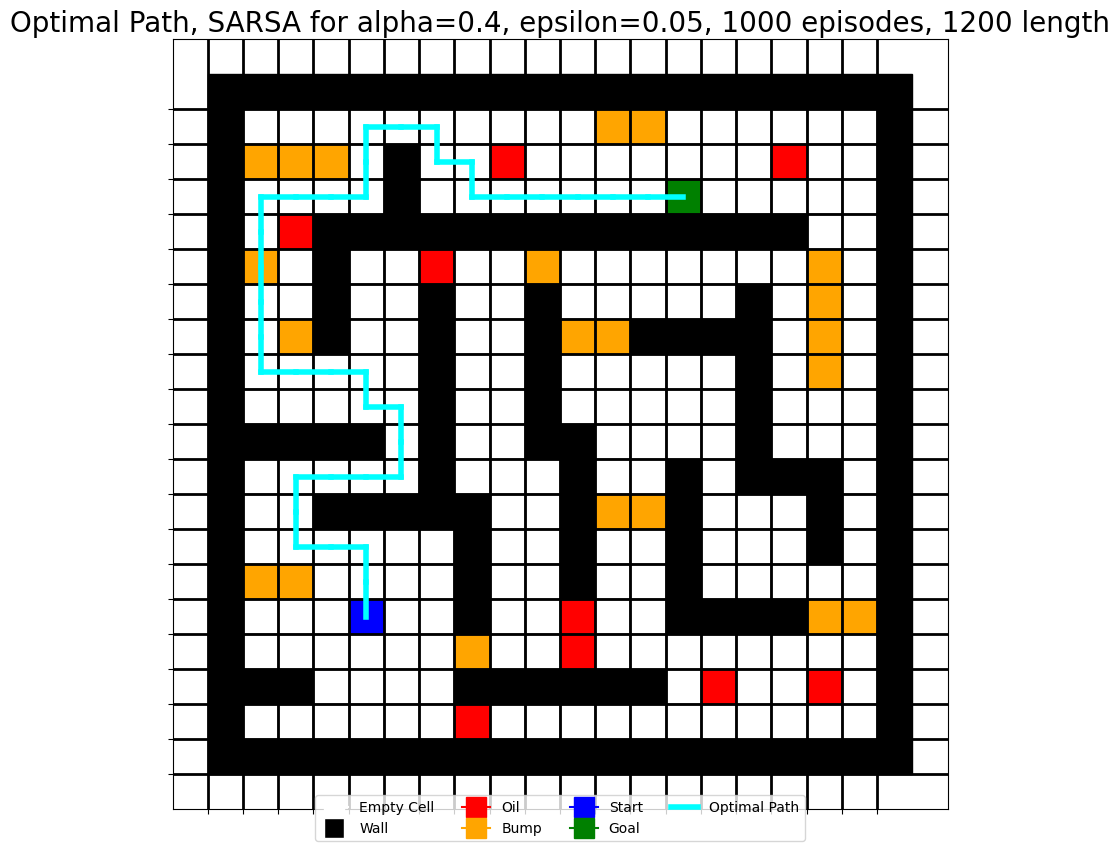